# 6.1.4 Generate random latitudes and longitudes
## Create Latitude and Longitude Combinations

In [1]:
%config Completer.use_jedi = False

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

from citipy import citipy

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
coordinates

[(-81.67524359781918, 88.96924245281201),
 (-79.54400742755556, -61.57830514021383),
 (58.773693235580595, 32.675574767865385),
 (4.335221105823976, 30.809830983160396),
 (-53.26194726444828, 158.55921266648124),
 (59.99087246847668, -122.53389980986029),
 (-85.20599552282671, 96.17388935104151),
 (39.794367324283826, 153.13410781007315),
 (-26.15450895914187, 3.724405683397606),
 (-73.70437303032963, -128.65054760299546),
 (-55.62775267862554, 177.86313975983103),
 (-5.486711805060665, 62.82280828806586),
 (34.807966074696665, 148.99458486694493),
 (67.5616701775835, 120.4264828167328),
 (-30.553681088606453, 173.11034937716664),
 (8.471505202551754, 91.80932875172584),
 (-16.785984532284047, -110.6448980946749),
 (74.88590079266925, -21.30178491022562),
 (-52.26582624157269, 111.97143888962938),
 (45.79815972778715, -58.69920223058722),
 (-65.1613644051557, 162.13717322800971),
 (56.65420885139275, -3.006602240542037),
 (-74.7516980283732, 47.64241228003735),
 (88.204979965484, 48.66

# 6.1.5 Generate Random World Cities

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        # Important:
        # Generally, it isn't good coding practice to add the pass statement to the except block.
        # Ideally, we want to handle or catch each error as it happens and do something specific (e.g., add another try block or print out the error).

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | malaya vishera
Processing Record 4 of Set 1 | yei
Processing Record 5 of Set 1 | tuatapere
Processing Record 6 of Set 1 | fort nelson
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | walvis bay
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | dunedin
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | zhigansk
Processing Record 15 of Set 1 | kaeo
Processing Record 16 of Set 1 | port blair
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | kirriemuir
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | belushya guba
Cit

Processing Record 43 of Set 4 | nome
Processing Record 44 of Set 4 | ulaangom
Processing Record 45 of Set 4 | kuznechnoye
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | guadalupe y calvo
Processing Record 48 of Set 4 | dicabisagan
Processing Record 49 of Set 4 | harnosand
Processing Record 50 of Set 4 | mentok
City not found. Skipping...
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | koslan
Processing Record 3 of Set 5 | erzin
Processing Record 4 of Set 5 | nhulunbuy
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | warrnambool
Processing Record 7 of Set 5 | ucluelet
Processing Record 8 of Set 5 | alyangula
Processing Record 9 of Set 5 | bestobe
Processing Record 10 of Set 5 | fukumitsu
Processing Record 11 of Set 5 | ambilobe
Processing Record 12 of Set 5 | kalaleh
Processing Record 13 of Set 5 | lardos
Processing Record 14 of Set 5 | leningradskiy
Processing Record 15 of Set 5 | kharan
Processing Record 16 of S

Processing Record 34 of Set 8 | circleville
Processing Record 35 of Set 8 | mongo
Processing Record 36 of Set 8 | garowe
Processing Record 37 of Set 8 | ruteng
Processing Record 38 of Set 8 | broken hill
Processing Record 39 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 40 of Set 8 | padang
Processing Record 41 of Set 8 | haines junction
Processing Record 42 of Set 8 | jinchang
Processing Record 43 of Set 8 | islamkot
Processing Record 44 of Set 8 | intipuca
Processing Record 45 of Set 8 | banepa
Processing Record 46 of Set 8 | sao jose da laje
Processing Record 47 of Set 8 | bengkulu
Processing Record 48 of Set 8 | south river
Processing Record 49 of Set 8 | viligili
City not found. Skipping...
Processing Record 50 of Set 8 | gejiu
Processing Record 1 of Set 9 | storsteinnes
Processing Record 2 of Set 9 | phuket
Processing Record 3 of Set 9 | mana
Processing Record 4 of Set 9 | matagami
Processing Record 5 of Set 9 | emmett
Processing Record 6 of Set 9 | chagda


Processing Record 17 of Set 12 | kulhudhuffushi
Processing Record 18 of Set 12 | inhambane
Processing Record 19 of Set 12 | husavik
Processing Record 20 of Set 12 | imeni babushkina
Processing Record 21 of Set 12 | nhamunda
Processing Record 22 of Set 12 | champerico
Processing Record 23 of Set 12 | iquique
Processing Record 24 of Set 12 | bagdarin
Processing Record 25 of Set 12 | talcahuano
Processing Record 26 of Set 12 | vardo
Processing Record 27 of Set 12 | shediac
Processing Record 28 of Set 12 | dwarka
Processing Record 29 of Set 12 | praia
Processing Record 30 of Set 12 | pundaguitan
Processing Record 31 of Set 12 | yagodnoye
Processing Record 32 of Set 12 | yuli
Processing Record 33 of Set 12 | kolpashevo
Processing Record 34 of Set 12 | villazon
Processing Record 35 of Set 12 | houston
Processing Record 36 of Set 12 | araouane
Processing Record 37 of Set 12 | san carlos de bariloche
Processing Record 38 of Set 12 | zola predosa
Processing Record 39 of Set 12 | bubaque
Process

In [11]:
len(city_data)

566

# 6.2.7 Create a DataFrame of City Weather Data

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,59.04,69,54,19.71,AU,2021-07-28 03:58:37
1,Ushuaia,-54.8000,-68.3000,38.86,93,75,3.44,AR,2021-07-28 03:58:37
2,Malaya Vishera,58.8454,32.2222,65.28,76,100,5.84,RU,2021-07-28 03:58:37
3,Yei,4.0950,30.6779,65.50,96,93,2.37,SS,2021-07-28 03:58:38
4,Tuatapere,-46.1333,167.6833,52.83,74,65,1.79,NZ,2021-07-28 03:58:38
5,Fort Nelson,58.8053,-122.7002,63.99,63,40,4.61,CA,2021-07-28 03:56:57
6,Albany,42.6001,-73.9662,67.08,93,89,3.15,US,2021-07-28 03:58:23
7,Walvis Bay,-22.9575,14.5053,55.09,76,0,2.30,NA,2021-07-28 03:58:39
8,Rikitea,-23.1203,-134.9692,74.52,79,100,14.63,PF,2021-07-28 03:58:39
9,Dunedin,-45.8742,170.5036,50.81,58,48,3.47,NZ,2021-07-28 03:58:39


In [13]:
# Reorder
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-07-28 03:58:37,-33.6500,115.3333,59.04,69,54,19.71
1,Ushuaia,AR,2021-07-28 03:58:37,-54.8000,-68.3000,38.86,93,75,3.44
2,Malaya Vishera,RU,2021-07-28 03:58:37,58.8454,32.2222,65.28,76,100,5.84
3,Yei,SS,2021-07-28 03:58:38,4.0950,30.6779,65.50,96,93,2.37
4,Tuatapere,NZ,2021-07-28 03:58:38,-46.1333,167.6833,52.83,74,65,1.79
...,...,...,...,...,...,...,...,...,...
561,Hirara,JP,2021-07-28 04:02:31,24.8000,125.2833,83.52,83,74,5.10
562,Cabedelo,BR,2021-07-28 04:02:32,-6.9811,-34.8339,74.73,85,14,9.98
563,Jumla,NP,2021-07-28 04:02:32,29.2747,82.1838,69.35,83,99,2.71
564,Port Lincoln,AU,2021-07-28 04:00:16,-34.7333,135.8667,57.02,54,16,23.76


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import time module
import time

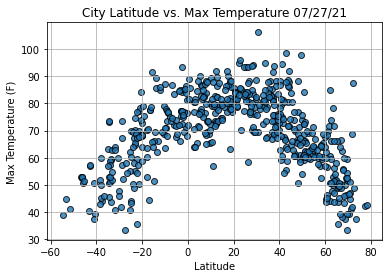

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

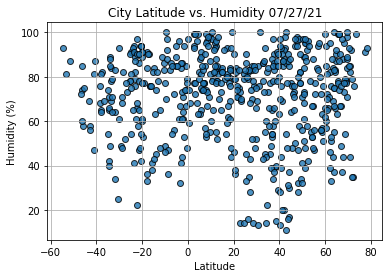

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

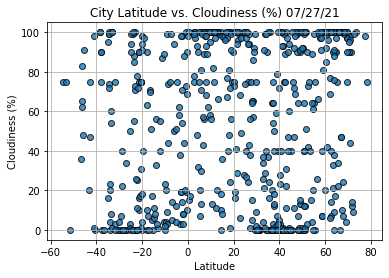

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

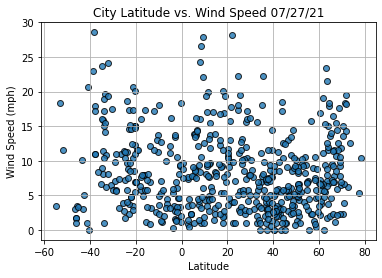

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

## Create a Linear Regression Function

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create the Hemisphere DataFrames

In [24]:
index13 = city_data_df.loc[13]
index13

City                         Kaeo
Country                        NZ
Date          2021-07-28 03:58:41
Lat                         -35.1
Lng                      173.7833
Max Temp                    63.32
Humidity                       74
Cloudiness                     95
Wind Speed                   6.71
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
561     True
562    False
563     True
564    False
565    False
Name: Lat, Length: 566, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Malaya Vishera,RU,2021-07-28 03:58:37,58.8454,32.2222,65.28,76,100,5.84
3,Yei,SS,2021-07-28 03:58:38,4.0950,30.6779,65.50,96,93,2.37
5,Fort Nelson,CA,2021-07-28 03:56:57,58.8053,-122.7002,63.99,63,40,4.61
6,Albany,US,2021-07-28 03:58:23,42.6001,-73.9662,67.08,93,89,3.15
10,Victoria,HK,2021-07-28 03:54:28,22.2855,114.1577,94.96,75,99,1.01
...,...,...,...,...,...,...,...,...,...
558,Eyl,SO,2021-07-28 04:02:30,7.9803,49.8164,79.68,54,98,24.25
559,Lovington,US,2021-07-28 04:02:31,32.9440,-103.3485,83.03,43,37,15.57
560,Suez,EG,2021-07-28 04:02:31,29.9737,32.5263,75.58,69,0,7.90
561,Hirara,JP,2021-07-28 04:02:31,24.8000,125.2833,83.52,83,74,5.10


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

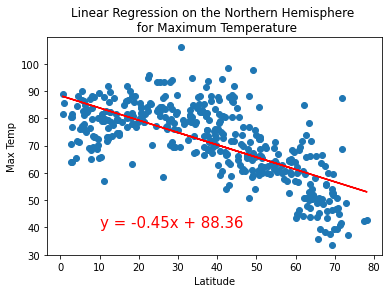

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


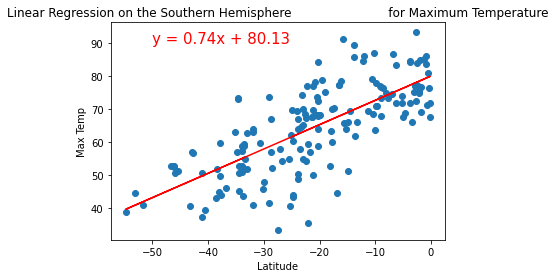

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

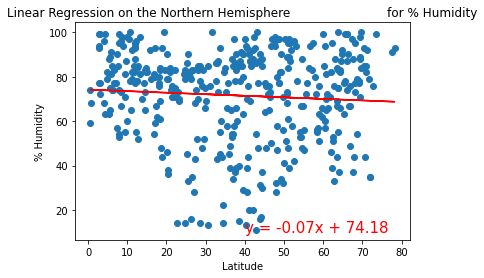

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

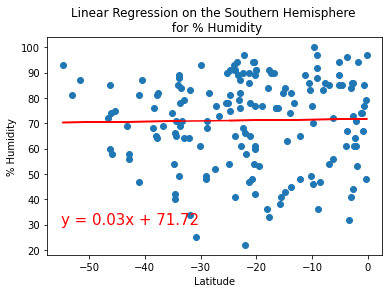

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,30))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

In [56]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Malaya Vishera,RU,2021-07-28 03:58:37,58.8454,32.2222,65.28,76,100,5.84
3,Yei,SS,2021-07-28 03:58:38,4.0950,30.6779,65.50,96,93,2.37
5,Fort Nelson,CA,2021-07-28 03:56:57,58.8053,-122.7002,63.99,63,40,4.61
6,Albany,US,2021-07-28 03:58:23,42.6001,-73.9662,67.08,93,89,3.15
10,Victoria,HK,2021-07-28 03:54:28,22.2855,114.1577,94.96,75,99,1.01
...,...,...,...,...,...,...,...,...,...
558,Eyl,SO,2021-07-28 04:02:30,7.9803,49.8164,79.68,54,98,24.25
559,Lovington,US,2021-07-28 04:02:31,32.9440,-103.3485,83.03,43,37,15.57
560,Suez,EG,2021-07-28 04:02:31,29.9737,32.5263,75.58,69,0,7.90
561,Hirara,JP,2021-07-28 04:02:31,24.8000,125.2833,83.52,83,74,5.10


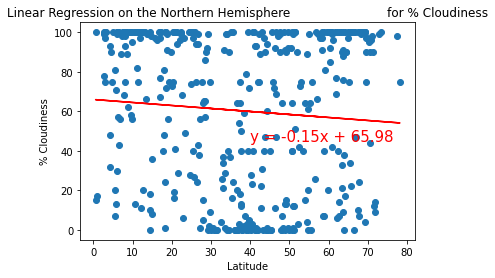

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,45))

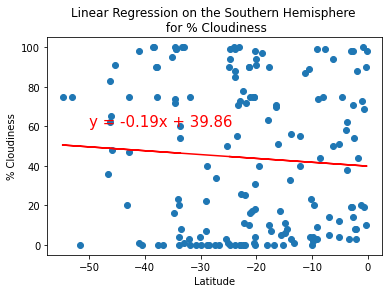

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

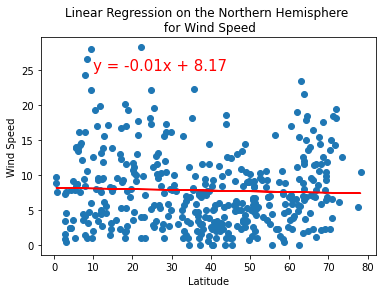

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,25))

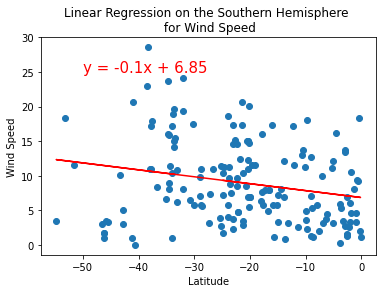

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))

# 6.5.1 Set Up Google Maps and Places API

## To install gmaps

```cmd
conda install -c conda-forge gmaps
```